In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2') 

In [3]:
# dts = pd.date_range(start='3/1/2023', end='12/1/2024', freq='MS')  
# df = pd.DataFrame({'dates': dts})
# df.to_csv('data/dates.csv')

In [4]:
data = pd.read_csv('data/dates.csv')


In [5]:
data.CPI = data.CPI.interpolate(method ='linear', limit_direction ='forward') 
data.UE = data.UE.interpolate(method ='linear', limit_direction ='forward') 
data['dates'] = data['dates'].astype('datetime64[ns]')
data

,Unnamed: 0,dates,CPI,UE
0,0,2023-03-01,301.740000,3.500000
1,1,2023-04-01,303.030000,3.400000
2,2,2023-05-01,303.360000,3.700000
3,3,2023-06-01,304.000000,3.600000
4,4,2023-07-01,304.630000,3.500000
5,5,2023-08-01,306.190000,3.800000
6,6,2023-09-01,307.290000,3.800000
7,7,2023-10-01,307.530000,3.800000
8,8,2023-11-01,308.020000,3.700000
9,9,2023-12-01,308.740000,3.700000


In [6]:
salary = pd.read_csv('data/median_salary_NY.csv')
salary['postingDate']= salary['postingDate'].astype('datetime64[ns]')
salary['postingDate'] = salary['postingDate'] - pd.offsets.MonthBegin(1)
salary['dates'] = salary['postingDate']
del salary['postingDate']
salary

,payGrade,dates
0,60750.0,2023-03-01
1,59500.0,2023-04-01
2,58000.0,2023-05-01
3,57200.0,2023-06-01
4,62500.0,2023-07-01
5,68650.0,2023-08-01
6,74625.0,2023-09-01
7,76166.0,2023-10-01
8,71500.0,2023-11-01
9,68500.0,2023-12-01


In [7]:
df = data.merge(salary, on='dates', how='left')#.drop('dates', axis=1)
df['ds'] = df['dates']
df['y'] = df['payGrade']
del df['Unnamed: 0']
del df['payGrade']
del df['dates']
df

,CPI,UE,ds,y
0,301.740000,3.500000,2023-03-01,60750.0
1,303.030000,3.400000,2023-04-01,59500.0
2,303.360000,3.700000,2023-05-01,58000.0
3,304.000000,3.600000,2023-06-01,57200.0
4,304.630000,3.500000,2023-07-01,62500.0
5,306.190000,3.800000,2023-08-01,68650.0
6,307.290000,3.800000,2023-09-01,74625.0
7,307.530000,3.800000,2023-10-01,76166.0
8,308.020000,3.700000,2023-11-01,71500.0
9,308.740000,3.700000,2023-12-01,68500.0


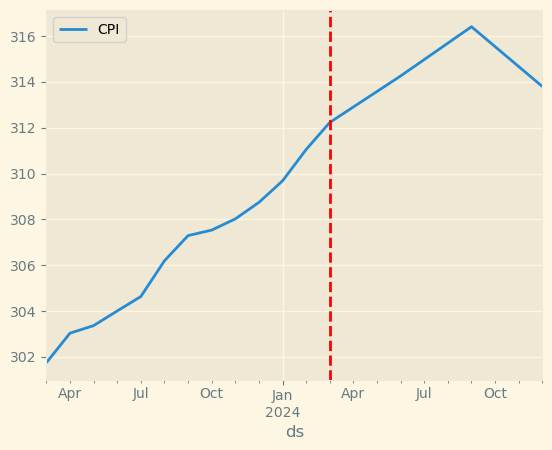

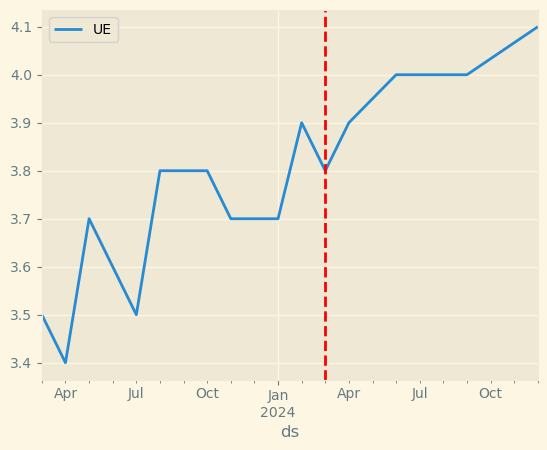

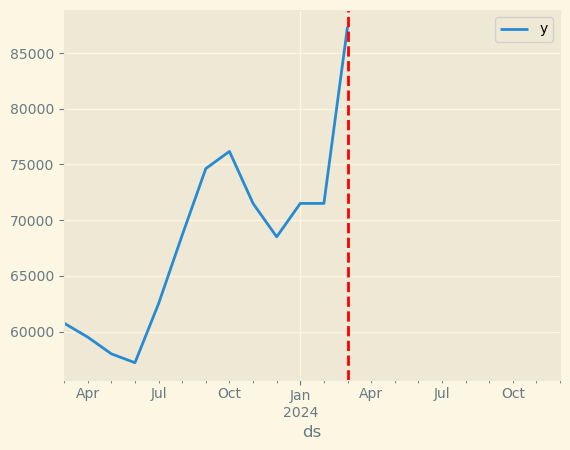

In [8]:
df.plot(x = 'ds', y='CPI')
plt.axvline(pd.to_datetime('2024-03-01'), color='r', linestyle='--', lw=2)
plt.show()
df.plot(x = 'ds', y='UE')
plt.axvline(pd.to_datetime('2024-03-01'), color='r', linestyle='--', lw=2)
plt.show()
df.plot(x = 'ds', y='y')
plt.axvline(pd.to_datetime('2024-03-01'), color='r', linestyle='--', lw=2)

plt.show()

In [9]:
split_date ='2024-04-01'
df_train = df.loc[df['ds'] < split_date]
df_test = df.loc[df['ds'] >= split_date]
del df_test['y']
df_train,df_test

(       CPI   UE         ds        y
 0   301.74  3.5 2023-03-01  60750.0
 1   303.03  3.4 2023-04-01  59500.0
 2   303.36  3.7 2023-05-01  58000.0
 3   304.00  3.6 2023-06-01  57200.0
 4   304.63  3.5 2023-07-01  62500.0
 5   306.19  3.8 2023-08-01  68650.0
 6   307.29  3.8 2023-09-01  74625.0
 7   307.53  3.8 2023-10-01  76166.0
 8   308.02  3.7 2023-11-01  71500.0
 9   308.74  3.7 2023-12-01  68500.0
 10  309.68  3.7 2024-01-01  71500.0
 11  311.05  3.9 2024-02-01  71500.0
 12  312.23  3.8 2024-03-01  87360.0,
            CPI        UE         ds
 13  312.906667  3.900000 2024-04-01
 14  313.583333  3.950000 2024-05-01
 15  314.260000  4.000000 2024-06-01
 16  314.976667  4.000000 2024-07-01
 17  315.693333  4.000000 2024-08-01
 18  316.410000  4.000000 2024-09-01
 19  315.540000  4.033333 2024-10-01
 20  314.670000  4.066667 2024-11-01
 21  313.800000  4.100000 2024-12-01)

In [11]:
# !pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 109.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 95.3 MB/s eta 0:00:00


In [14]:
import timeit
start_time = timeit.default_timer()

from prophet import Prophet
model = Prophet(interval_width = 0.9)
model.add_regressor('CPI', standardize = False)
model.add_regressor('UE', standardize = False)
model.fit(df_train)

print(timeit.default_timer() - start_time)


11:17:29 - cmdstanpy - INFO - Chain [1] start processing
11:17:29 - cmdstanpy - INFO - Chain [1] done processing


0.04318769000019529


In [ ]:
model.params

In [15]:
forecast = model.predict(df_test)
forecast = forecast[['ds', 'yhat']]
forecast

,ds,yhat
0,2024-04-01,81811.989873
1,2024-05-01,83610.448936
2,2024-06-01,85425.849585
3,2024-07-01,86889.251074
4,2024-08-01,88369.594149
5,2024-09-01,89849.937225
6,2024-10-01,89457.584712
7,2024-11-01,89082.173785
8,2024-12-01,88689.821273


In [16]:
final = df_test.merge(forecast, on='ds', how='left')#.drop('dates', axis=1)
final['y'] = final['yhat']
del final['yhat']
concat = pd.concat([df_train, final], ignore_index=True)
concat

,CPI,UE,ds,y
0,301.740000,3.500000,2023-03-01,60750.000000
1,303.030000,3.400000,2023-04-01,59500.000000
2,303.360000,3.700000,2023-05-01,58000.000000
3,304.000000,3.600000,2023-06-01,57200.000000
4,304.630000,3.500000,2023-07-01,62500.000000
5,306.190000,3.800000,2023-08-01,68650.000000
6,307.290000,3.800000,2023-09-01,74625.000000
7,307.530000,3.800000,2023-10-01,76166.000000
8,308.020000,3.700000,2023-11-01,71500.000000
9,308.740000,3.700000,2023-12-01,68500.000000


<Axes: xlabel='ds'>

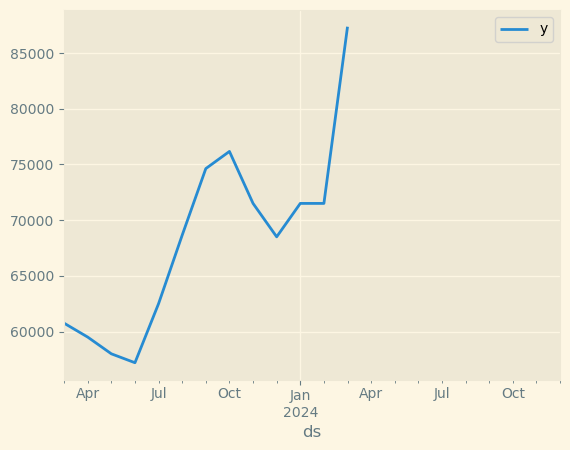

In [17]:
df.plot(x='ds', y='y')

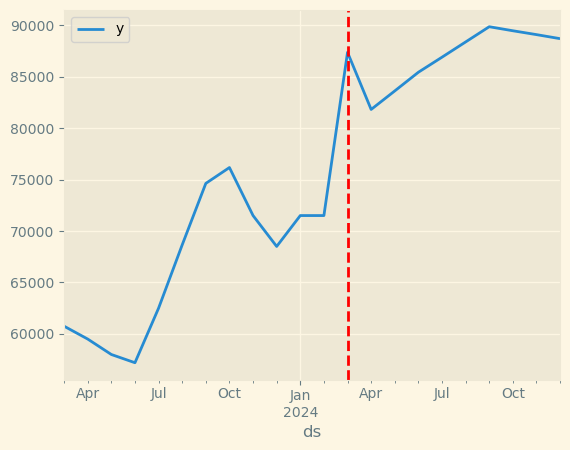

In [18]:

concat.plot(x='ds', y='y')
plt.axvline(pd.to_datetime('2024-03-01'), color='r', linestyle='--', lw=2)
